In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
conference =  pd.read_csv('conference.csv')
game_statistics = pd.read_csv('game-statistics.csv')
drive = pd.read_csv('drive.csv')
game = pd.read_csv('game.csv')
kickoff_return = pd.read_csv('kickoff-return.csv')
kickoff = pd.read_csv('kickoff.csv')
ppass = pd.read_csv('pass.csv')
play = pd.read_csv('play.csv')
player_game_statistics = pd.read_csv('player-game-statistics.csv')
player = pd.read_csv('player.csv')
punt_return = pd.read_csv('punt-return.csv')
punt = pd.read_csv('punt.csv')
reception = pd.read_csv('reception.csv')
rush = pd.read_csv('rush.csv')
stadium = pd.read_csv('stadium.csv')
team_game_statistics = pd.read_csv('team-game-statistics.csv')
team = pd.read_csv('team.csv')

In [3]:
merged_team_conference = pd.merge(team, team_game_statistics, on= 'Team Code')

Q 2: How does the Big Ten compare to other conferences in terms of defensive statistics, such as forced fumbles, sacks, limiting offensive time of possession, etc. The Big Ten is generally known as a strong defense conference, so this would be interesting to see the actual statistics. 

In [4]:
team_game_statistics.head()

,Team Code,Game Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,...,Time Of Possession,Penalty,Penalty Yard,Third Down Att,Third Down Conv,Fourth Down Att,Fourth Down Conv,Red Zone Att,Red Zone TD,Red Zone Field Goal
0,5,5055920050910,21,23,0,46,26,362,3,0,...,1433,5,42,13,2,3,0,2,1,1
1,5,5041920050917,39,102,0,43,23,319,2,3,...,2154,8,49,14,7,2,0,5,2,0
2,5,503000520050924,32,119,1,39,20,406,5,0,...,1764,5,36,15,6,0,0,4,3,1
3,5,129000520051001,24,90,0,57,30,270,2,3,...,1908,5,50,20,7,1,1,2,0,1
4,5,5008620051008,36,79,1,33,12,145,0,0,...,1657,9,89,18,3,3,1,5,1,2


In [21]:
#defense_stats = merged_team_conference.groupby('Conference Code').agg(['mean','std'])
defense_categories = ['Conference Code','Tackle For Loss', 'Tackle For Loss Yard', 'Sack', 
                      'Sack Yard', 'QB Hurry', 'Fumble Forced', 'Pass Broken Up', 'Kick/Punt Blocked']

defense_stats = merged_team_conference[defense_categories]
big_ten_defense_stats = defense_stats[defense_stats['Conference Code'] == 827]
big_ten_defense_stats['Big Ten'] = 'Yes'
other_defense_stats = defense_stats[defense_stats['Conference Code'] != 827]
other_defense_stats['Big Ten'] = 'No'
joined_conferences = pd.concat([big_ten_defense_stats,other_defense_stats])

C:\Users\Phil\Anaconda3\envs\si618\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Phil\Anaconda3\envs\si618\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
for col in big_ten_defense_stats.columns[1:-1]:
    print(col)
    print([stats.ttest_ind(big_ten_defense_stats[col], other_defense_stats[col], equal_var=False)])

Tackle For Loss
[Ttest_indResult(statistic=-1.3620259613584016, pvalue=0.17516662670625152)]
Tackle For Loss Yard
[Ttest_indResult(statistic=-1.0407183169412415, pvalue=0.29964354674122079)]
Sack
[Ttest_indResult(statistic=-0.63772018235485117, pvalue=0.5246275011761744)]
Sack Yard
[Ttest_indResult(statistic=-0.92396790181748134, pvalue=0.3569627594661372)]
QB Hurry
[Ttest_indResult(statistic=-0.61394108869910191, pvalue=0.5401337727234321)]
Fumble Forced
[Ttest_indResult(statistic=-1.0269208110773611, pvalue=0.30606443009114265)]
Pass Broken Up
[Ttest_indResult(statistic=0.95270423206082122, pvalue=0.3421452695357895)]
Kick/Punt Blocked
[Ttest_indResult(statistic=-1.1707398325916085, pvalue=0.24343549310091453)]


In [15]:
[[stats.ttest_ind(big_ten_defense_stats[col], other_defense_stats[col], equal_var=False)] for col in big_ten_defense_stats.columns[1:-1]]

[[Ttest_indResult(statistic=-1.3620259613584016, pvalue=0.17516662670625152)],
 [Ttest_indResult(statistic=-1.0407183169412415, pvalue=0.29964354674122079)],
 [Ttest_indResult(statistic=-0.63772018235485117, pvalue=0.5246275011761744)],
 [Ttest_indResult(statistic=-0.92396790181748134, pvalue=0.3569627594661372)],
 [Ttest_indResult(statistic=-0.61394108869910191, pvalue=0.5401337727234321)],
 [Ttest_indResult(statistic=-1.0269208110773611, pvalue=0.30606443009114265)],
 [Ttest_indResult(statistic=0.95270423206082122, pvalue=0.3421452695357895)],
 [Ttest_indResult(statistic=-1.1707398325916085, pvalue=0.24343549310091453)]]

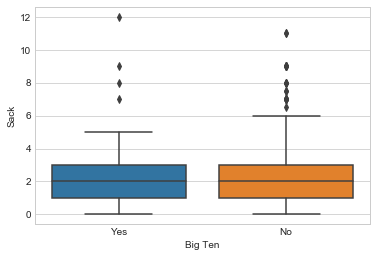

In [23]:
sns.set_style("whitegrid")
ax = sns.boxplot(y='Sack', x = 'Big Ten', data =joined_conferences )
plt.show()


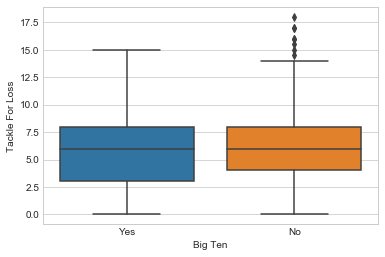

In [24]:
ax = sns.boxplot(y='Tackle For Loss', x = 'Big Ten', data =joined_conferences )
plt.show()

In [25]:
defense_categories = ['Conference Code','Sack Yard','Int Ret Yard','Punt','Tackle For Loss Yard','Pass Broken Up','Fum Ret Yard','QB Hurry','Int Ret',
           'Fum Ret','Safety','Def 2XP Made','Kick/Punt Blocked','Fumble Forced','Pass Int','Sack','Tackle For Loss',
           'Tackle Assist','Tackle Solo','Fum Ret TD','Int Ret TD','Def 2XP Att']

defense_stats = merged_team_conference[defense_categories]
big_ten_defense_stats = defense_stats[defense_stats['Conference Code'] == 827]
big_ten_defense_stats['Big Ten'] = 'Yes'
other_defense_stats = defense_stats[defense_stats['Conference Code'] != 827]
other_defense_stats['Big Ten'] = 'No'
joined_conferences = pd.concat([big_ten_defense_stats,other_defense_stats])

C:\Users\Phil\Anaconda3\envs\si618\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Phil\Anaconda3\envs\si618\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
for col in big_ten_defense_stats.columns[1:-1]:
    print(col)
    print([stats.ttest_ind(big_ten_defense_stats[col], other_defense_stats[col], equal_var=False)])

Sack Yard
[Ttest_indResult(statistic=-0.92396790181748134, pvalue=0.3569627594661372)]
Int Ret Yard
[Ttest_indResult(statistic=-0.2195038553844165, pvalue=0.82654348714730341)]
Punt
[Ttest_indResult(statistic=-2.3184209353644007, pvalue=0.021730677189279526)]
Tackle For Loss Yard
[Ttest_indResult(statistic=-1.0407183169412415, pvalue=0.29964354674122079)]
Pass Broken Up
[Ttest_indResult(statistic=0.95270423206082122, pvalue=0.3421452695357895)]
Fum Ret Yard
[Ttest_indResult(statistic=1.1335111818617549, pvalue=0.25896839081493189)]
QB Hurry
[Ttest_indResult(statistic=-0.61394108869910191, pvalue=0.5401337727234321)]
Int Ret
[Ttest_indResult(statistic=-1.3539572436380407, pvalue=0.17760931139023811)]
Fum Ret
[Ttest_indResult(statistic=-1.4038986707224725, pvalue=0.1621503846593238)]
Safety
[Ttest_indResult(statistic=-0.60118423853695746, pvalue=0.54853093534212538)]
Def 2XP Made
[Ttest_indResult(statistic=0.91381654103571519, pvalue=0.36241997060490849)]
Kick/Punt Blocked
[Ttest_indResu

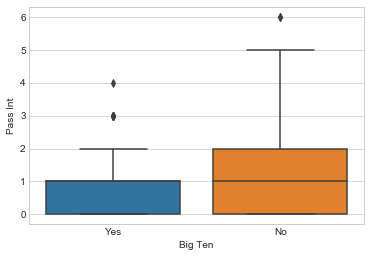

In [27]:
ax = sns.boxplot(y='Pass Int', x = 'Big Ten', data =joined_conferences )
plt.show()